# **Data Collection Notebook**

## Objectives

* fetch data from kaggle and save it as raw data.
* Inspect the data and save it under outputs/datasets/collections 

## Inputs

* Kaggle JSON file - the autherization token

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* Cant think of anything to add.


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/PP5-ML/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/PP5-ML'

# Section 1 - Fetch Data from Kaggle

Install Kaggle package to fetch data

In [5]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


---

# Section 2 - Import Kaggle authentication

In order to get the raw data, we need to bring in the Kaggle file and then determine which dataset we are using.

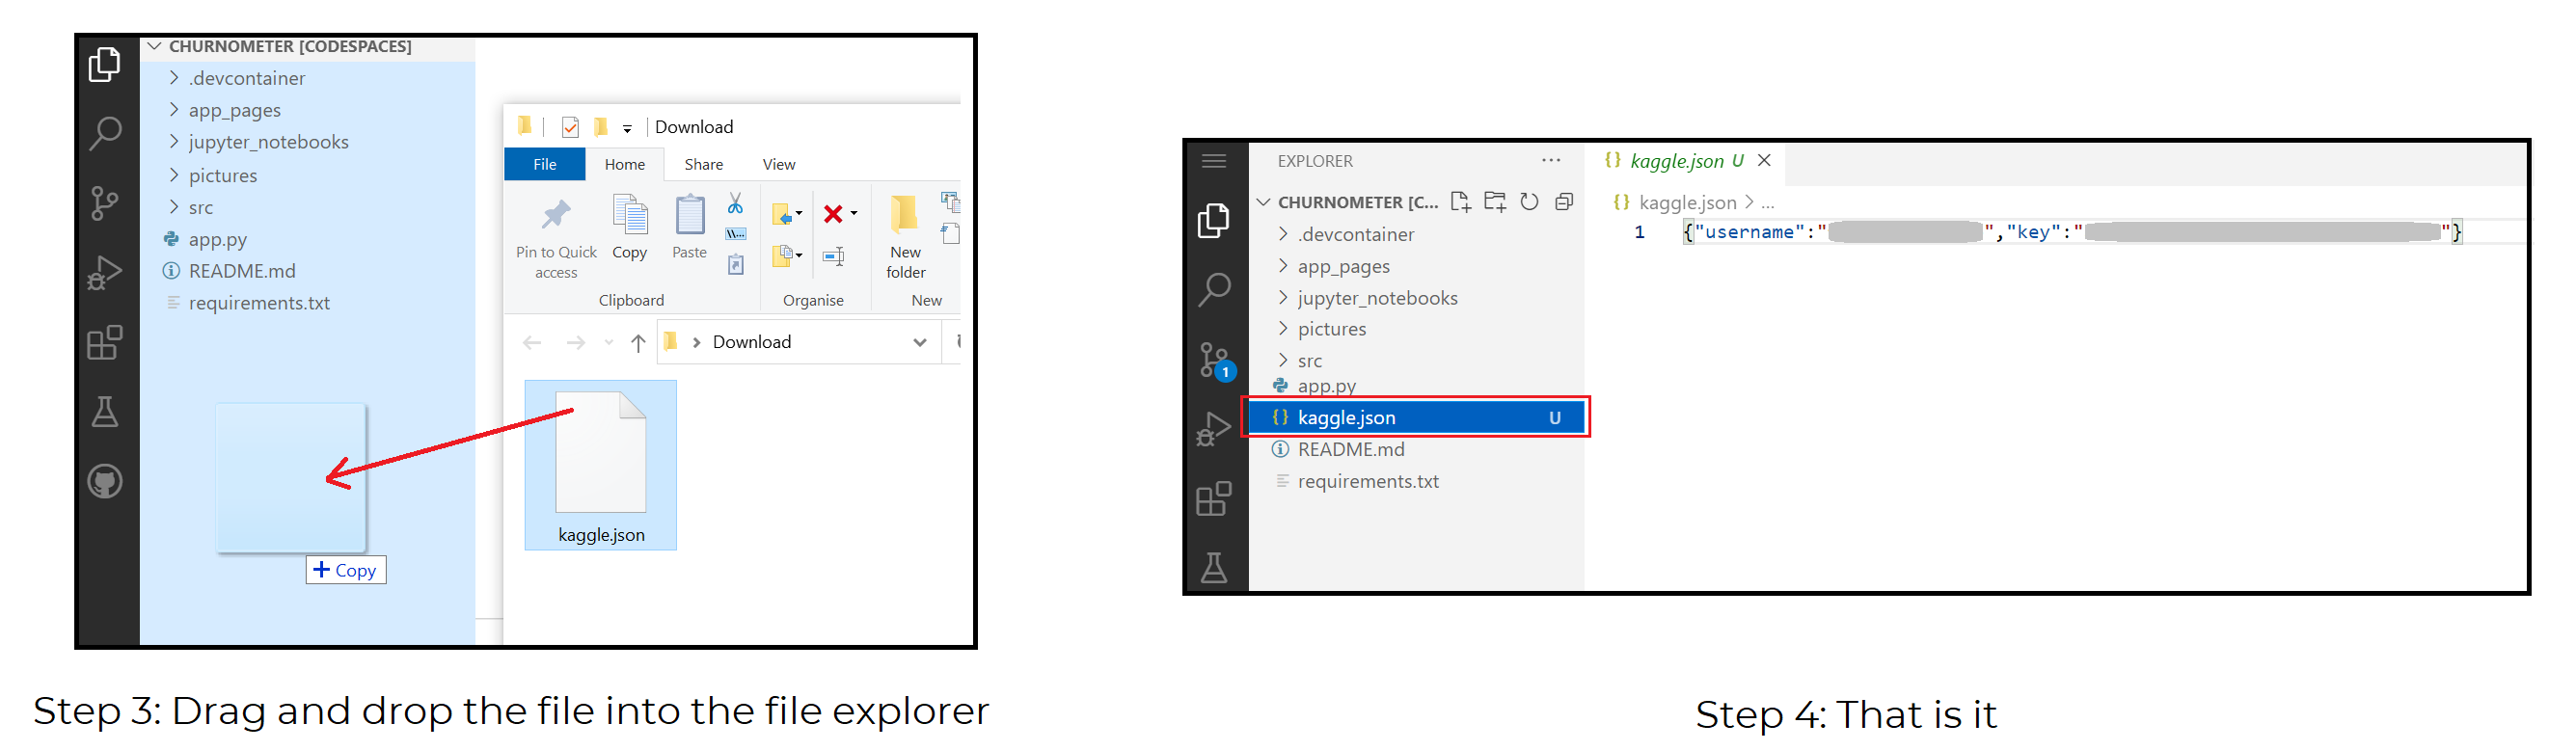

Once you do that, run the cell below, so the token is recognized in the session.

In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

chmod: cannot access 'kaggle.json': No such file or directory


We are using the following [Kaggle Dataset](https://www.kaggle.com/datasets/codeinstitute/housing-prices-data)

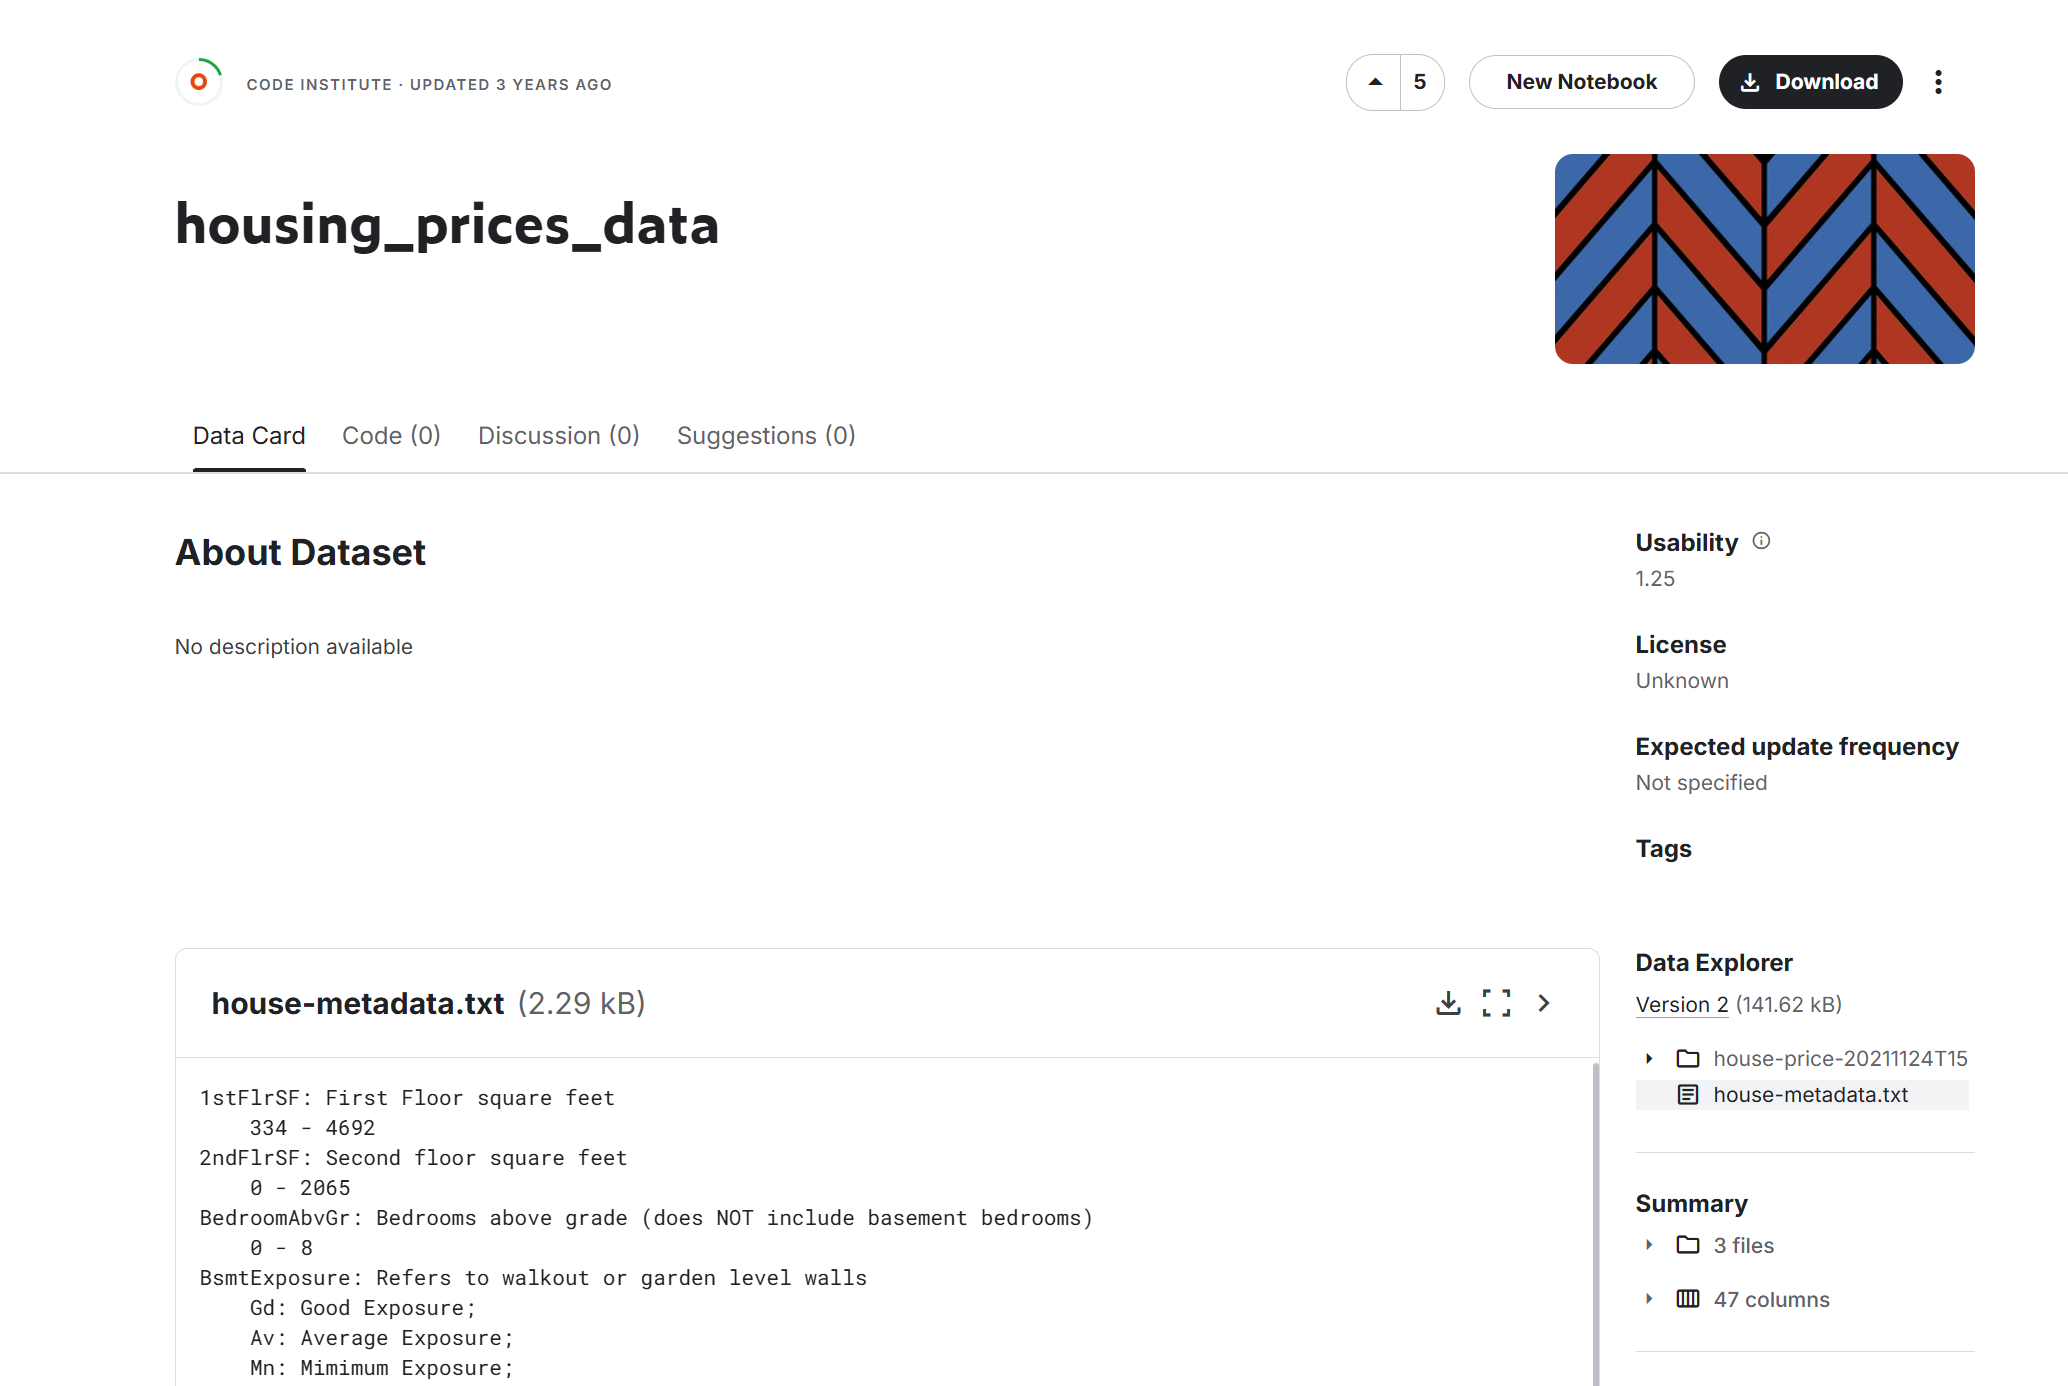

Get the dataset from the Kaggle URL

In [7]:
KaggleDatasetPath = "codeinstitute/housing-prices-data"
DestinationFolder = "inputs/datasets/raw"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Dataset URL: https://www.kaggle.com/datasets/codeinstitute/housing-prices-data
License(s): unknown
  0%|                                               | 0.00/49.6k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 49.6k/49.6k [00:00<00:00, 2.33MB/s]


Unzip the downloaded folder, then delete the zip file and the kaggle.JSON token. 

In [8]:
! unzip -o {DestinationFolder}/*.zip -d {DestinationFolder} \
  && rm {DestinationFolder}/*.zip \
  && rm kaggle.json

Archive:  inputs/datasets/raw/housing-prices-data.zip
  inflating: inputs/datasets/raw/house-metadata.txt  
  inflating: inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv  
  inflating: inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/inherited_houses.csv  
rm: cannot remove 'kaggle.json': No such file or directory


You should notice that the kaggle.json file is no longer in the directory.

-------------

## Load and Inspect the Kaggle Data

In [9]:
import pandas as pd
df = pd.read_csv(f"/workspace/PP5-ML/inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


Notice we have 24 columns of data to work with, so we will need to narrow down the variables to only the most impactful

DataFrame Summary

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

Notice how many floads, integers and objects are in the DataFrame

Quick check to see if there is any data that is duplicated

In [11]:
df[df.duplicated()]

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice


It appears that there is no obvious repeats in the data, which is good.

---

NOTE

* For now, no transforming the data has been made. There are some objects that can be transformed into catagorial data
  * For Example: BsmtFinType1, BsmtExposure, GarageFinish, KitchenQual

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [12]:
import os
try:
  os.makedirs(name='outputs/datasets/collection')
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/collection/housing_prices.csv",index=False)

[Errno 17] File exists: 'outputs/datasets/collection'


This section is now completed :)